In [4]:
import pickle

with open("./results/eksperimen_1_vig_results.pkl", "rb") as f:
    loaded_result = pickle.load(f)


In [5]:
import matplotlib.pyplot as plt


def smooth(values, window):
    """Smooth the values using a simple moving average."""
    smoothed_values = []
    for i in range(len(values)):
        start = max(0, i - window + 1)
        end = i + 1
        smoothed_values.append(sum(values[start:end]) / (end - start))
    return smoothed_values


def plot_loss_curves(results: dict[str, list[float]], smoothing_window=5):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
        smoothing_window (int): window size for smoothing. Default is 5.
    """
    # Get the loss values of the results dictionary (training and test)
    loss = smooth(results["train_loss"], smoothing_window)
    test_loss = smooth(results["test_loss"], smoothing_window)
    # Get the accuracy values of the results dictionary (training and test)
    accuracy = smooth(results["train_acc"], smoothing_window)
    test_accuracy = smooth(results["test_acc"], smoothing_window)
    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))
    # Setup a plot
    plt.figure(figsize=(8,3))
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylim(0, 2.5)  # Set y-axis limits for loss subplot
    plt.legend()
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylim(0, 1)  # Set y-axis limits for accuracy subplot
    plt.legend()
    plt.show()


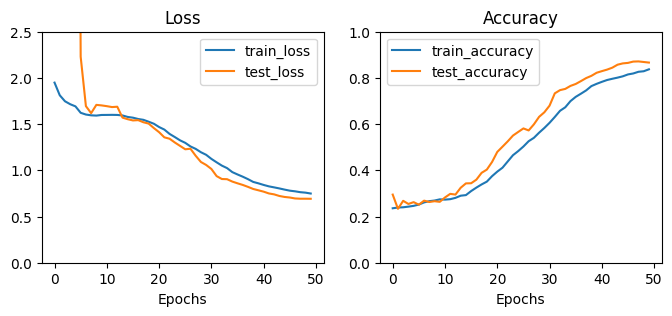

: 

In [6]:
plot_loss_curves(loaded_result)